In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

mercedes_data=pd.read_csv('train.csv')

mercedes_data.shape

mercedes_data.columns

mercedes_data.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
mercedes_data.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [7]:
mercedes_data.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [8]:
target=mercedes_data['y']

In [9]:
mercedes_data.drop(columns='y',inplace=True)

In [10]:
cols_to_drop=[]

In [12]:
for col in mercedes_data.columns:
    if len(np.unique(mercedes_data[col]))== mercedes_data.shape[0] or len(np.unique(mercedes_data[col]))==1:
        cols_to_drop.append(col)

In [13]:
cols_to_drop

['ID',
 'X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347',
 'ID',
 'X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [14]:
mercedes_data.drop(columns=cols_to_drop,inplace=True)

In [16]:
mercedes_data

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_train,X_test,y_train,y_test=train_test_split(mercedes_data,target,test_size=0.2,random_state=42)

In [18]:
X_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1006,m,v,as,c,d,ag,k,x,0,0,...,0,0,1,0,0,0,0,0,0,0
1840,n,s,as,d,d,ae,g,s,0,0,...,1,0,0,0,0,0,0,0,0,0
3792,f,c,m,c,d,v,i,e,0,0,...,0,0,1,0,0,0,0,0,0,0
152,j,aa,g,d,d,i,i,e,0,0,...,0,1,0,0,0,0,0,0,0,0
1557,ay,i,as,c,d,ad,l,k,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,j,i,as,c,d,r,l,r,0,0,...,0,0,1,0,0,0,0,0,0,0
466,az,y,e,c,d,d,j,j,0,0,...,0,0,0,0,0,0,1,0,0,0
3092,y,w,ae,c,d,q,i,c,0,0,...,1,0,0,0,0,0,0,0,0,0
3772,y,r,ak,f,d,v,i,b,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X_test

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1073,al,o,ai,f,d,ag,j,l,0,0,...,0,0,0,0,0,0,0,0,0,0
144,f,l,ae,f,d,i,i,w,0,0,...,0,0,0,0,0,0,0,0,0,0
2380,j,aa,ay,c,d,n,l,o,1,0,...,1,0,0,0,0,0,0,0,0,0
184,az,y,b,c,d,i,j,l,0,0,...,0,0,0,0,0,0,1,0,0,0
2587,ak,v,ak,d,d,m,i,r,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,x,b,m,c,d,c,d,n,0,0,...,0,0,1,0,0,0,0,0,0,0
3975,t,b,m,c,d,w,j,w,0,0,...,0,0,1,0,0,0,0,0,0,0
907,z,aa,ay,c,d,ag,h,s,1,0,...,1,0,0,0,0,0,0,0,0,0
3597,f,v,ae,c,d,r,g,m,0,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
y_train

1006     88.96
1840     89.90
3792     92.59
152     108.84
1557    111.15
         ...  
3444    109.42
466      78.25
3092     92.18
3772     91.92
860      87.71
Name: y, Length: 3367, dtype: float64

In [21]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [22]:
le=LabelEncoderExt()

cat_cols=[col for col in X_train.columns if X_train[col].dtype=='object']
for col in cat_cols:
    le.fit(X_train[col])
    X_train[col]=le.transform(X_train[col])
    X_test[col]=le.transform(X_test[col])
    

X_train.values

array([[34, 24, 17, ...,  0,  0,  0],
       [35, 21, 17, ...,  0,  0,  0],
       [27,  5, 33, ...,  0,  0,  0],
       ...,
       [45, 25,  4, ...,  0,  0,  0],
       [45, 20,  9, ...,  0,  0,  0],
       [22,  2,  8, ...,  0,  0,  0]], dtype=int64)

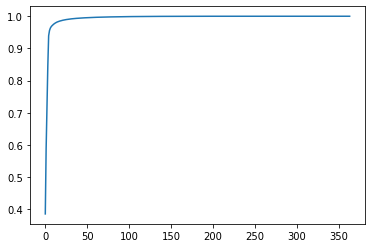

In [23]:
from sklearn.decomposition import  PCA

pca=PCA()
X_train_pca_df=pd.DataFrame(pca.fit_transform(X_train))

plt.plot(np.cumsum(pca.explained_variance_ratio_))